In [21]:
import numpy as np
from helper import parse_data, get_data, transform_text
from textblob import TextBlob, Word
import matplotlib.pyplot as plt
from pprint import pprint
import json
from collections import Counter


In [3]:
tags = ['title', 'author', 'selftext', 'link_flair_text', 'url_overridden_by_dest', 'post_hint']
file = 'data/data1643662718.json'
data = get_data(file)
df = parse_data(data, tags)
df.head()

,title,author,selftext,link_flair_text,url_overridden_by_dest,post_hint
0,What happened with Yi Wei?,jinnyjuice,"After his immortal game, I thought he was goin...",Miscellaneous,NaN,NaN
1,Chess improvement,Dynastyhdva1990,"Hello, I'd like to request some assistance.\nI...",Chess Question,NaN,NaN
2,What's up with lichess' anonymous players?,ForcedCheckMate,I recently got logged out of my lichess accoun...,Miscellaneous,NaN,NaN
3,Sam Shankland is frustrated by an improbable s...,losalad,,News/Events,https://twitter.com/SamShankland/status/148783...,link
4,What is this theme?,Anish1337,,Miscellaneous,https://i.redd.it/9e2rxy1fv1f81.png,image


In [4]:
df = df.replace(r'^\s*$', np.NaN, regex=True)

In [5]:
df.info()
df.selftext.tolist()[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   6000 non-null   object
 1   author                  6000 non-null   object
 2   selftext                3000 non-null   object
 3   link_flair_text         6000 non-null   object
 4   url_overridden_by_dest  2580 non-null   object
 5   post_hint               3240 non-null   object
dtypes: object(6)
memory usage: 281.4+ KB


'After his immortal game, I thought he was going to be the next to take the throne. Does anyone know what happened? Is it his personal life? Opportunities? Other obligations?'

In [6]:
#df['url_overridden_by_dest'].tolist()[0:100]
df['post_hint'].unique()

array([nan, 'link', 'image', 'self', 'rich:video'], dtype=object)

In [7]:
#df.loc[df['post_hint']=='self'].head()
test = df.title.tolist()
TextBlob(test[5]).correct()

TextBlob("White to play and win in 6 (missed it in bullet)")

In [8]:
pol = []
subj = []
df.dropna(subset=['selftext'], inplace=True)
for sentence in df.selftext:
    t = TextBlob(sentence)
    polarity, subjectivity = t.sentiment
    pol.append(polarity)
    subj.append(subjectivity)

df['polarity'] = pol
df['subjectivity'] = subj
df

,title,author,selftext,link_flair_text,url_overridden_by_dest,post_hint,polarity,subjectivity
0,What happened with Yi Wei?,jinnyjuice,"After his immortal game, I thought he was goin...",Miscellaneous,NaN,NaN,-0.131250,0.268750
1,Chess improvement,Dynastyhdva1990,"Hello, I'd like to request some assistance.\nI...",Chess Question,NaN,NaN,0.022222,0.311111
2,What's up with lichess' anonymous players?,ForcedCheckMate,I recently got logged out of my lichess accoun...,Miscellaneous,NaN,NaN,0.255688,0.606614
11,Chess research computer advice?,jbl_iii,I’m looking into setting up a dedicated comput...,Chess Question,NaN,NaN,0.167857,0.439286
12,1600 Player Struggling with White - High WR wi...,xNYKx,"Hi,\n\nThank you for your responses in advance...",Chess Question,NaN,self,0.117976,0.328821
...,...,...,...,...,...,...,...,...
5993,Is Fischer not a household name?,BalanceForsaken,Yesterday I was very surprised to find out tha...,Miscellaneous,NaN,NaN,0.221000,0.530000
5994,Somebody please help John Bartholomew,LordKelvin_273,Could anyone that regularly watches John Barth...,Twitch.TV,NaN,self,-0.021241,0.492456
5996,Event: Tata Steel Masters 2022 - Round 13,ChessBotMod,[**Official Website**](https://tatasteelchess....,Tournament,NaN,self,0.127764,0.445041
5997,Looking for French Defense videos,MinasTirith8,I'm looking for a comprehensive video on the W...,Strategy: Openings,NaN,NaN,0.390000,0.500000


In [9]:
pprint(df.loc[(df.polarity > 0.2)].selftext.tolist())

['I recently got logged out of my lichess account because I changed browsers. '
 'Since then, I have been playing as a guest/anonymous player on the site and '
 'to my shock most people I play against are pretty good. I myself am 1800 '
 'blitz lichess and was close to 1800 on chess. com (before I lost 200 points '
 'in one night). I expected that when you play against anonymous players, most '
 'of them would be pretty bad, as people who are decent at chess probably have '
 'an account. To my surprise, I keep playing against players that are pretty '
 'good. I expected that most of the games would be against people who blunder '
 'left and right, but in reality most people I play against know opening '
 'theory and seem to be somewhere between 1600 and 1900 elo. Does somebody '
 'also experienced this and was surprised?',
 'Hello everyone, new to sub here. A lot has been said about My Great '
 'Predecessors, A History of Chess and others must-have chess books. Although '
 'really good

In [10]:

df.describe()

,polarity,subjectivity
count,3000.000000,3000.000000
mean,0.102930,0.428270
std,0.146392,0.196108
min,-0.206667,0.000000
25%,0.000000,0.311111
50%,0.117321,0.451687
75%,0.194156,0.533333
max,0.500000,1.000000


<AxesSubplot:>

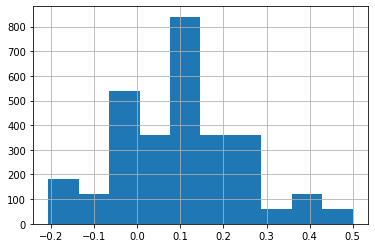

In [11]:
df.polarity.hist()
# min -.2 max 

<AxesSubplot:>

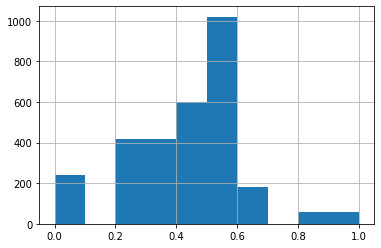

In [12]:
df.subjectivity.hist()

In [13]:
df.corr()

,polarity,subjectivity
polarity,1.00000,0.42757
subjectivity,0.42757,1.00000


In [14]:
# create a column with cleaned selftext
res = []
for text in df.selftext:
    res.append(transform_text(text))
df['content'] = res
df.sample(5)

,title,author,selftext,link_flair_text,url_overridden_by_dest,post_hint,polarity,subjectivity,content
5377,"Polgar,Pandolfini or Nunn?",Karlssonp,"Which chess book for beginners do you prefer,...",Chess Question,NaN,NaN,0.285714,0.535714,"[chess, book, beginners, prefer, susan, polgar..."
2924,Why do we say damiano's bishop mate / checkmat...,nicbentulan,# r/chesstempo u/chesstempo definitions:\n\n1....,Chess Question,NaN,self,-0.200000,0.250000,"[r/chesstempo, u/chesstempo, definitions, 1, d..."
4358,Looking for stone chess pieces,jeannyboi,Any suggestions?,Miscellaneous,NaN,NaN,0.000000,0.000000,[suggestions]
5098,Are chess tournaments actually fun?,reykjavik_dream,I've been playing chess since lockdown started...,Chess Question,NaN,NaN,0.125641,0.502991,"['ve, playing, chess, since, lockdown, started..."
4902,What's up with lichess' anonymous players?,ForcedCheckMate,I recently got logged out of my lichess accoun...,Miscellaneous,NaN,NaN,0.255688,0.606614,"[recently, got, logged, lichess, account, chan..."


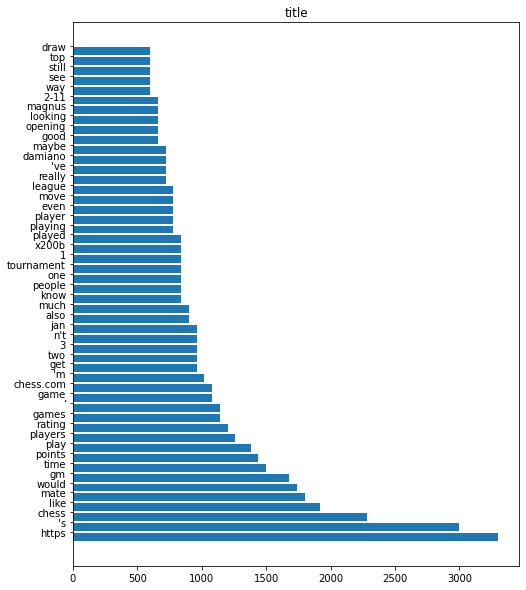

In [16]:
# graph frequency distribution
x = 50
plt.figure(figsize=(8, 10))
c = Counter(df.content.sum())
most_common_words = sorted(c.items(), key=lambda x: x[1], reverse=True)[:x]
plt.barh(range(x), [n for w, n in most_common_words]) 
plt.yticks([x + 0.5 for x in range(x)], [w for w, n in most_common_words])
plt.title("title")
plt.show()

In [32]:
k = 5
l = [''] * k
d = {'data': l}
for m in range(k):
    data = df.selftext.sample(10).to_dict()
    d['data'][m] = data
#with open('test.json', 'w') as f:
    #f.write(json.dumps(d))


In [34]:
with open('test.json') as f:
    data = json.load(f)

len(data['data'])

5